# Random Forest Classification

In [1]:
# Random Forest Classification
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv(r'E:\Users\Public\Documents\data_sciencePdf\june\29th ,30th June\29th,30th\5. RANDOM FOREST\Social_Network_Ads.csv')
dataset                     

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
##Extracting Independent and dependent Variable  
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, -1].values


In [4]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

 


In [6]:
# Training the Random Forest Classification model on the Traning set
from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier(n_estimators=125, criterion="entropy",random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=125, random_state=0)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [8]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[55  3]
 [ 2 20]]


In [9]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test , y_pred)
print(ac)

0.9375


In [10]:
bias = classifier.score(x_train, y_train)
bias

0.996875

In [11]:
variance = classifier.score(x_test, y_test)
variance

0.9375

# Visualizing the training set results

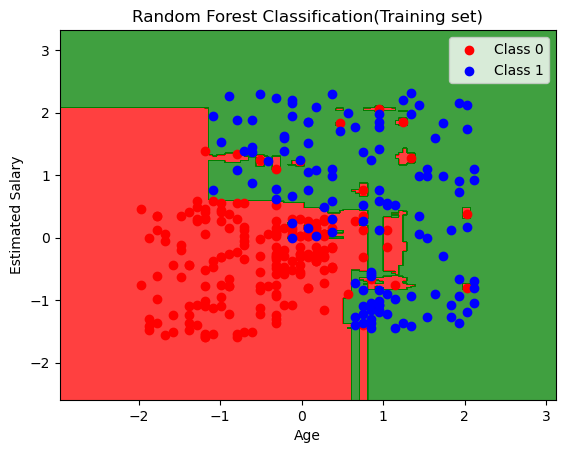

In [12]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[: ,0].max() +1, step = 0.01),
                     np.arange(start = x_set[: , 1].min() -1, stop = x_set[:, 1].max() +1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
#for i, j in enumerate(np.unique(y_set)):
    #plt.scatter(x_set[y_set ==j, 0], x_set[y_set ==j, 1],

               # c= ListedColormap(('red','green'))(i), label = j)
colors = np.array(['red', 'blue'])  # Map class 0 to red and class 1 to blue

for j in np.unique(y_set):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=colors[j],  # 'c' can be used for mapping based on values
                label=f'Class {j}')
    
plt.title('Random Forest Classification(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
        

# Visualizing the testing set results

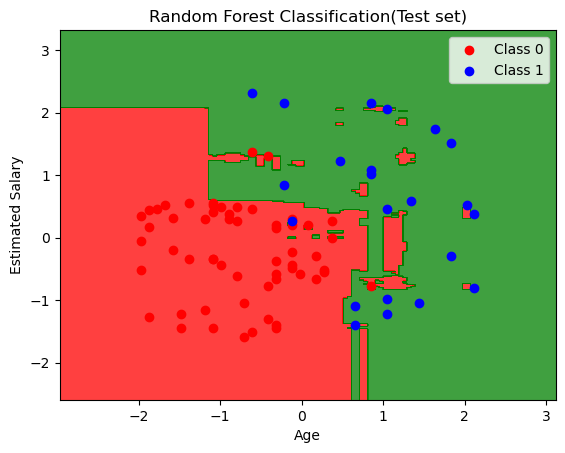

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() +1, step = 0.01), 
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() +1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
                                        alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
colors = np.array(['red', 'blue'])  # Map class 0 to red and class 1 to blue

for j in np.unique(y_set):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=colors[j],  # 'c' can be used for mapping based on values
                label=f'Class {j}')
plt.title('Random Forest Classification(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
